In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm
%config InlineBackend.figure_format = 'retina'

plt.rc('font', size=14)

### Load DataV

In [2]:
dir_datav = '/home/hhg/Research/emu_Nx2pt/data/train_300_raw/'
datav0 = np.loadtxt(dir_datav+'10x2pt_emu_0')[:,1]
mask0 = np.loadtxt(dir_datav+'10x2pt_emu_0'+'_mask.txt')[:,1]

In [3]:
mask0

array([1., 1., 1., ..., 1., 1., 1.])

### Load Cov

In [4]:
import pickle

data_dir = '/home/hhg/Research/emu_Nx2pt/data/'
filename = data_dir+'cov3500.pkl'

with open(filename, 'rb') as handle:
    cov_full = pickle.load(handle)

## Experiment: Just take 1 correlation bin

In [5]:
mask0[0:25]

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 0., 0., 0.])

In [6]:
mask0[0:22]

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1.])

In [7]:
dv = datav0[0:22]
cov = cov_full[0:22, 0:22]

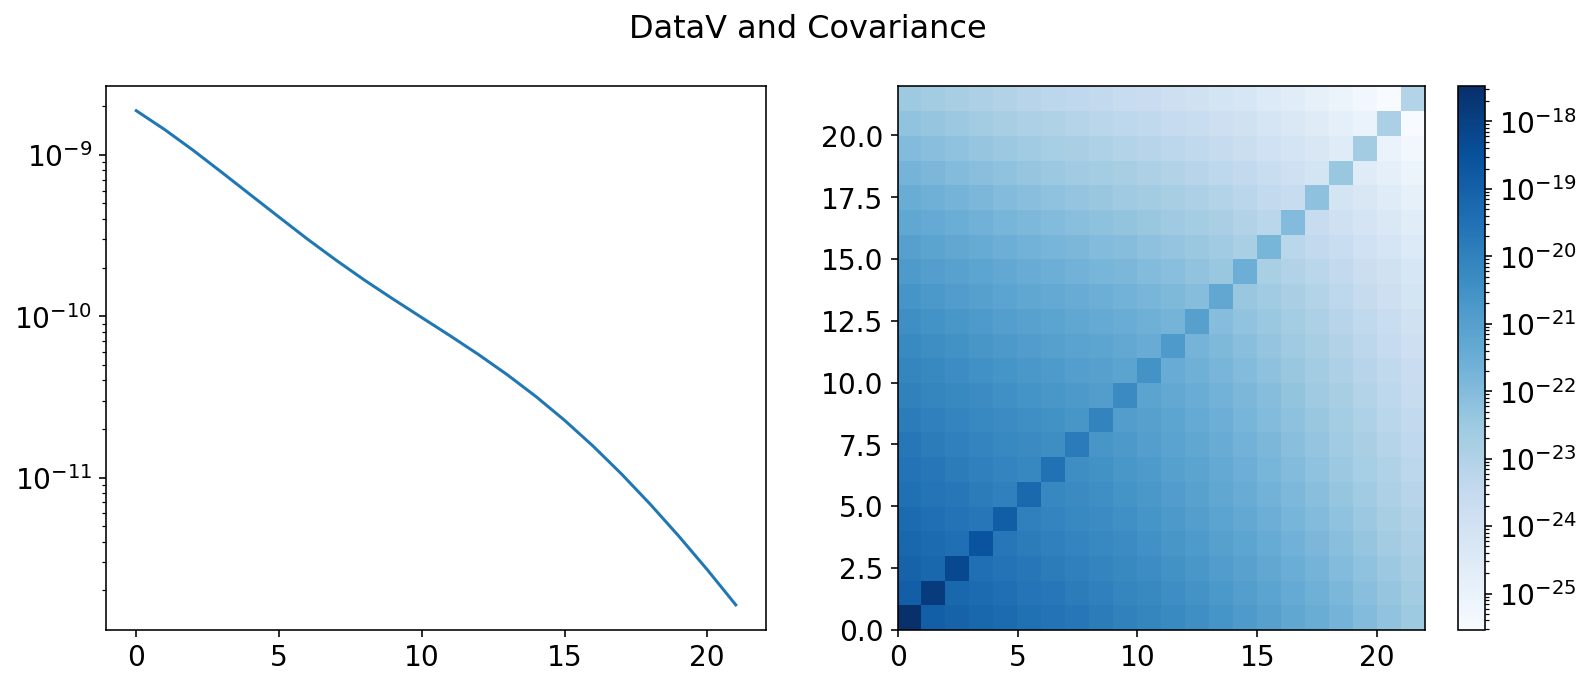

In [8]:
fig = plt.figure(figsize=(13,5))
fig.suptitle(f'DataV and Covariance', fontsize=16)

# ----------
plt.subplot(1, 2, 1)
plt.plot(range(0,22), dv)
plt.yscale('log')

# ----------

plt.subplot(1, 2, 2)
plt.pcolor(cov, norm=LogNorm(), cmap='Blues')
plt.colorbar()

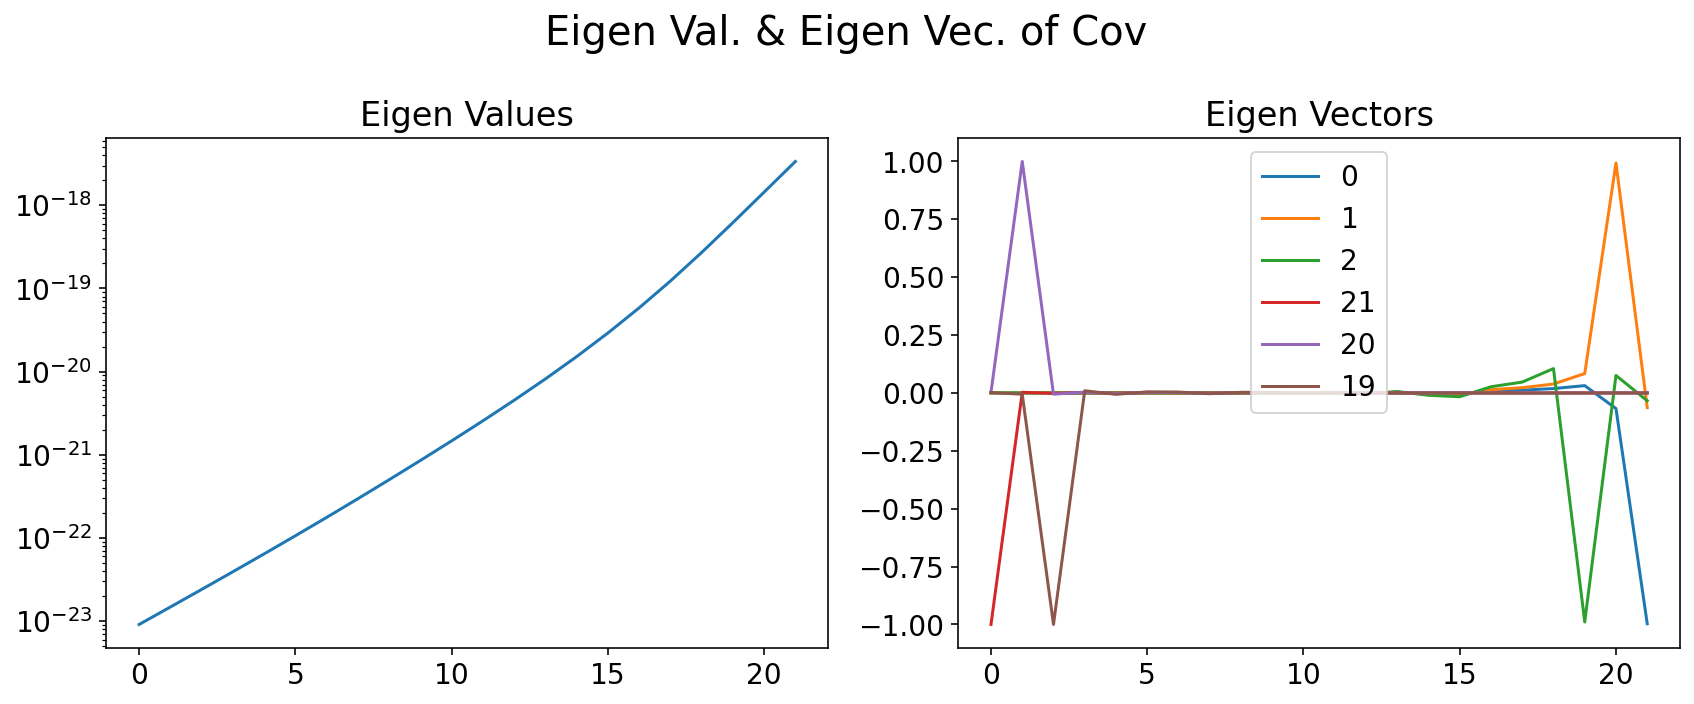

In [9]:
eigensys = np.linalg.eigh(cov)
evals = eigensys[0]
evecs = eigensys[1]

# ----------

fig = plt.figure(figsize=(12,5))
fig.suptitle(f'Eigen Val. & Eigen Vec. of Cov', fontsize=20)

plt.subplot(1, 2, 1)
plt.plot(range(0,22), evals)
plt.yscale('log')
plt.title('Eigen Values')

# ----------

plt.subplot(1, 2, 2)

for i in [0,1,2,21,20,19]:
    plt.plot(range(0,22), evecs[i], label=f'{i}')
#plt.yscale('log')
plt.legend(loc='upper center')
plt.title('Eigen Vectors')

# ----------

plt.tight_layout()

## Cholesky Decomposition

<img src="./plots/PCA.png" alt="" width="400">

In [10]:
L = np.linalg.cholesky(cov)
invL = np.linalg.inv(L)

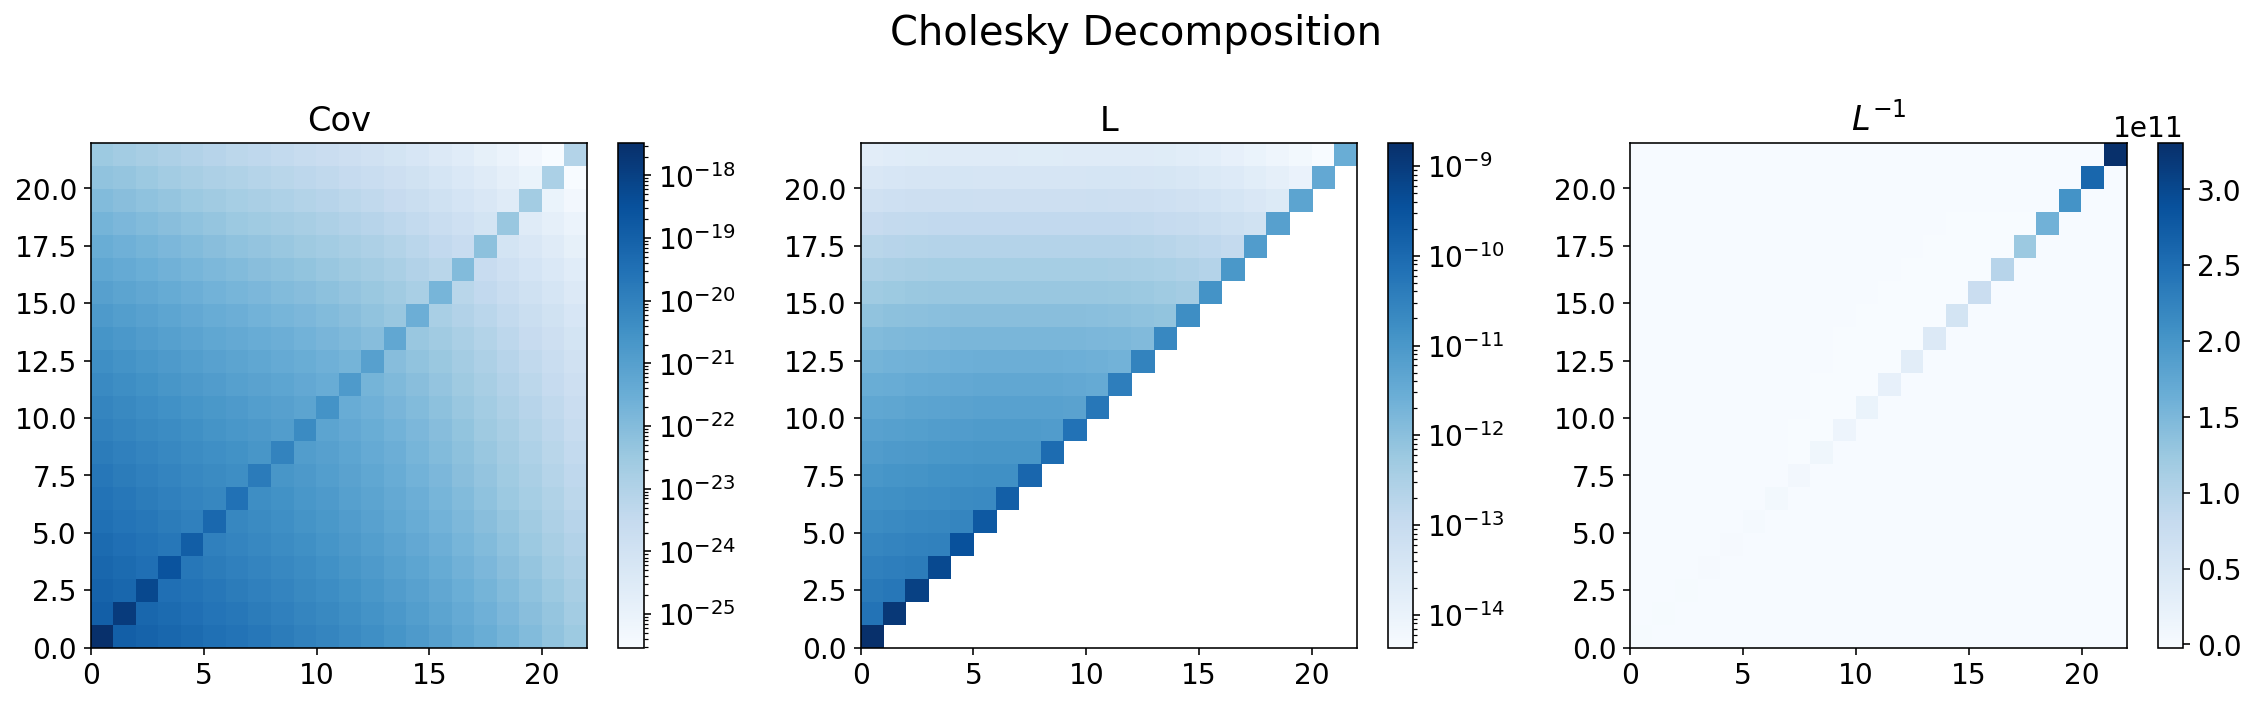

In [11]:
fig = plt.figure(figsize=(16,5))
fig.suptitle(f'Cholesky Decomposition', fontsize=20)

plt.subplot(1, 3, 1)
plt.pcolor(cov, norm=LogNorm(), cmap='Blues')
plt.colorbar()
plt.title('Cov')

plt.subplot(1, 3, 2)
plt.pcolor(L, norm=LogNorm(), cmap='Blues')
plt.colorbar()
plt.title('L')

# plt.subplot(1, 3, 2)
# plt.pcolor(L.T, norm=LogNorm(), cmap='Blues')
# plt.colorbar()
# plt.title('$L^t$')

plt.subplot(1, 3, 3)
plt.pcolor(invL, cmap='Blues')
plt.colorbar()
plt.title('$L^{-1}$')

plt.tight_layout()


## Transformed Data Vector

dv_ch = invL@dv

In [12]:
dv_ch = invL@dv

Text(0.5, 1.0, 'dv_ch = invL@dv')

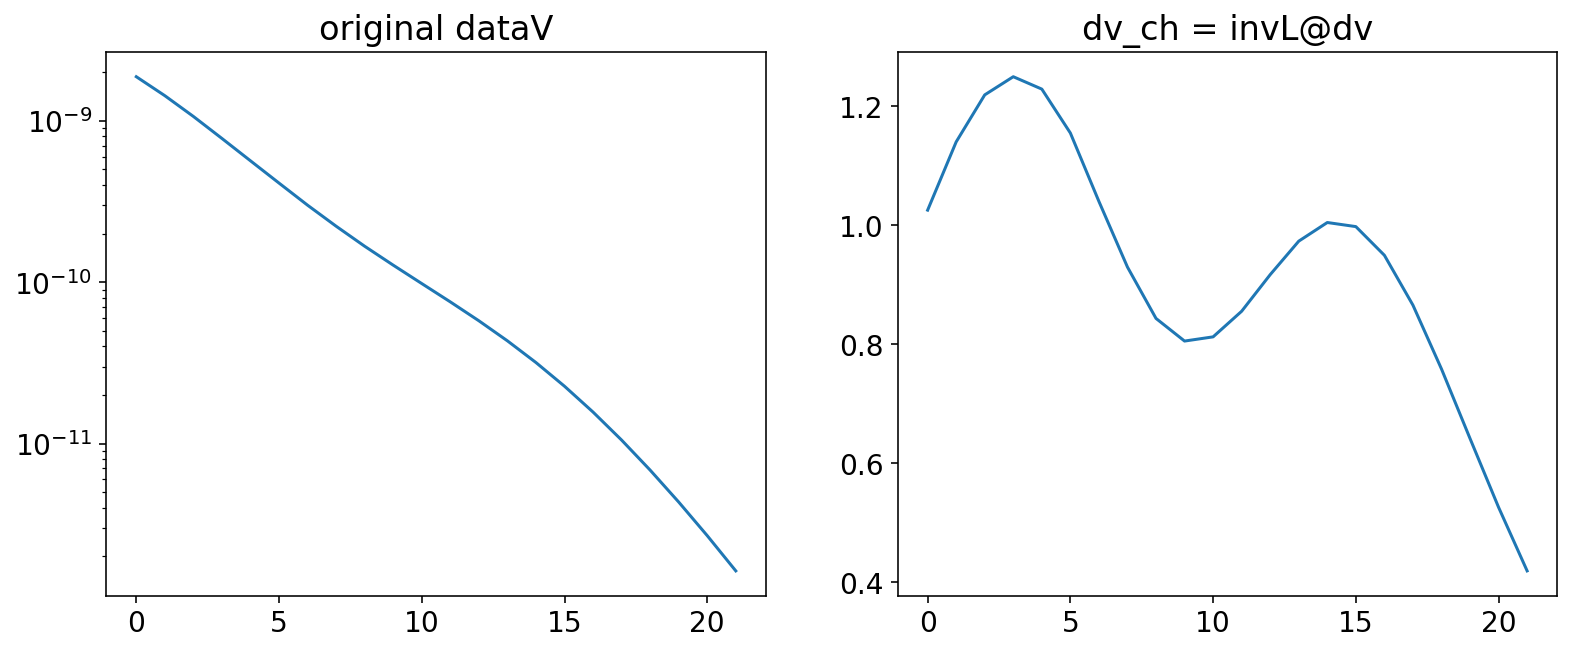

In [45]:
fig = plt.figure(figsize=(13,5))
#fig.suptitle(f'DataV and Covariance', fontsize=16)

# ----------
plt.subplot(1, 2, 1)
plt.plot(range(0,22), dv)
plt.yscale('log')
plt.title('original dataV')
# ----------

plt.subplot(1, 2, 2)
plt.plot(range(0,22), dv_ch)
plt.title('dv_ch = invL@dv')

## Larger range of data vectors

In [19]:
L_full    = np.linalg.cholesky(cov_full)
invL_full = np.linalg.inv(L_full)

Text(0.5, 1.0, 'Cov (full, 3500)')

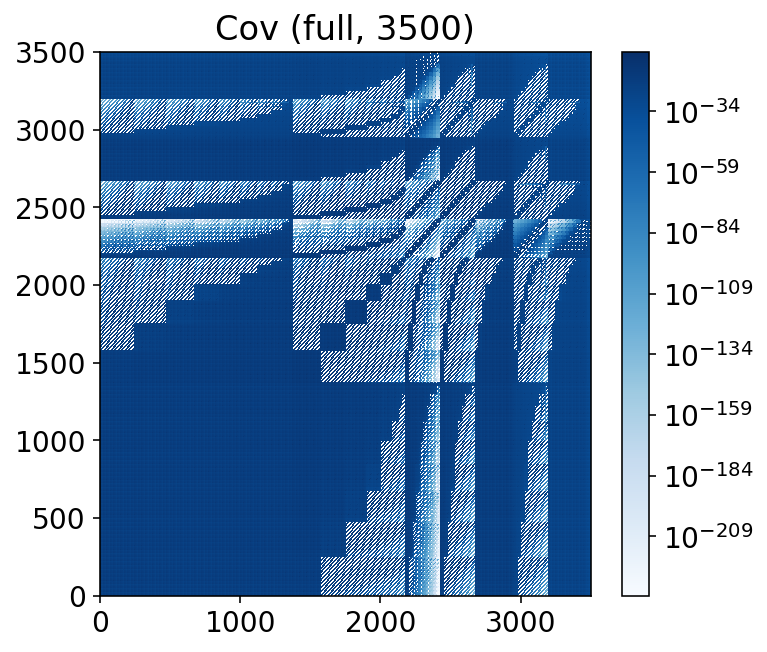

In [23]:
plt.figure(figsize=(5.5,5))
plt.pcolor(cov_full, norm=LogNorm(), cmap='Blues')
plt.colorbar()
plt.title('Cov (full, 3500)')

Text(0.5, 1.0, 'L (full, 3500)')

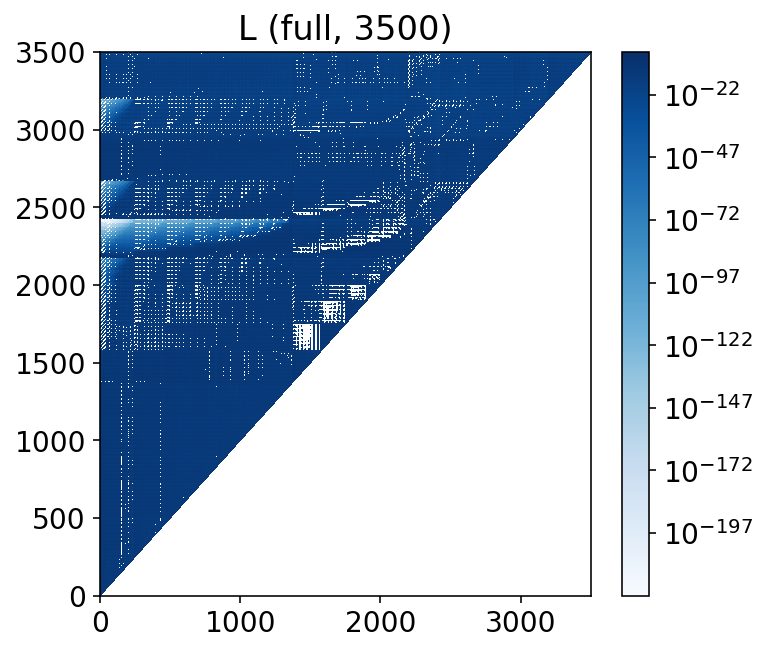

In [24]:
plt.figure(figsize=(5.5,5))
plt.pcolor(L_full, norm=LogNorm(), cmap='Blues')
plt.colorbar()
plt.title('L (full, 3500)')

Text(0.5, 1.0, '$L^{-1}$ (full, 3500)')

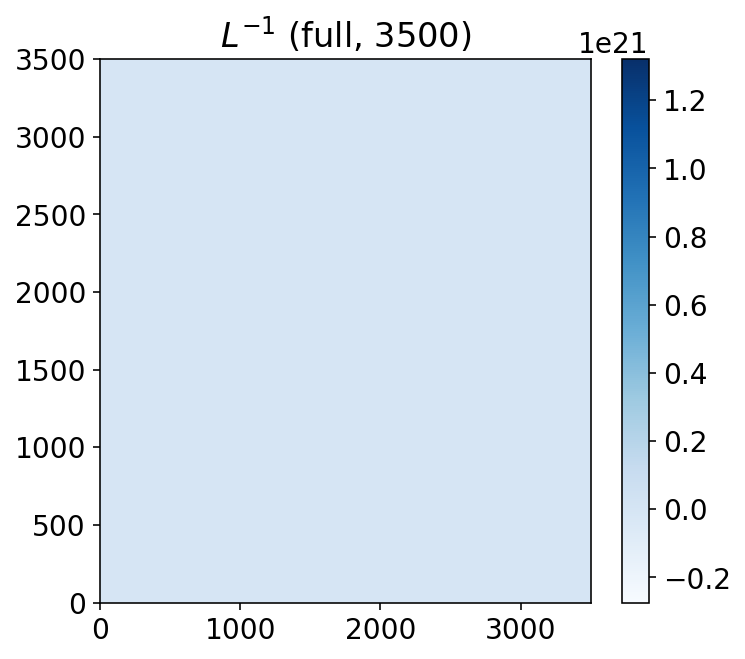

In [26]:
plt.figure(figsize=(5.5,5))
plt.pcolor(invL_full, cmap='Blues')
plt.colorbar()
plt.title('$L^{-1}$ (full, 3500)')

In [47]:
cov_full[19:25, 19:25]

array([[2.41556185e-23, 9.43616700e-26, 5.17718300e-26, 2.77625600e-26,
        1.45728900e-26, 7.50457000e-27],
       [9.43616700e-26, 1.48336548e-23, 2.92201600e-26, 1.57012500e-26,
        8.25617900e-27, 4.25831000e-27],
       [5.17718300e-26, 2.92201600e-26, 9.14026968e-24, 8.67155600e-27,
        4.56815700e-27, 2.35969400e-27],
       [2.77625600e-26, 1.57012500e-26, 8.67155600e-27, 5.64411222e-24,
        2.46907000e-27, 1.27743100e-27],
       [1.45728900e-26, 8.25617900e-27, 4.56815700e-27, 2.46907000e-27,
        3.48971306e-24, 6.76261400e-28],
       [7.50457000e-27, 4.25831000e-27, 2.35969400e-27, 1.27743100e-27,
        6.76261400e-28, 2.15928014e-24]])

### Scale cut Cov -> Transform v.s. Transform -> take the cutted part

In [27]:
dv_ch_full = invL_full@datav0

Text(0.5, 1.0, 'cut->trans v.s. trans->cut')

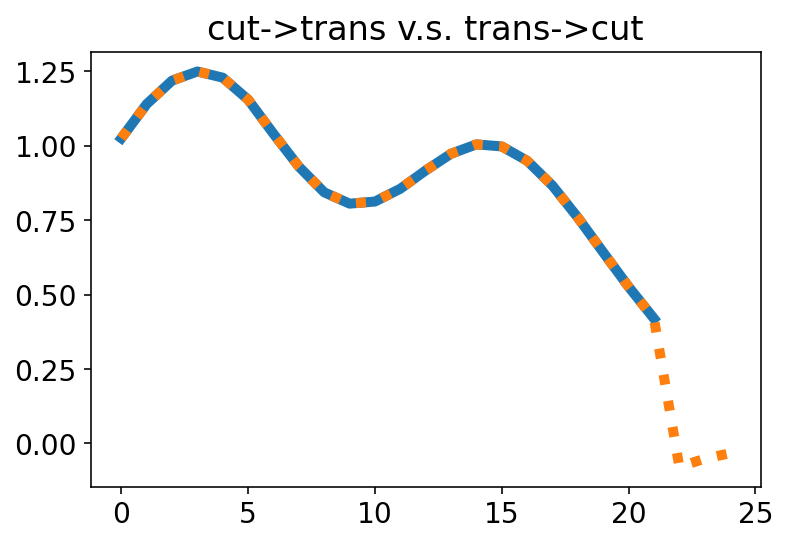

In [40]:
plt.figure(figsize=(6,4))
plt.plot(range(0,22), dv_ch, lw=5)
plt.plot(range(0,25), dv_ch_full[0:25], ls=':', lw=5)
plt.title('cut->trans v.s. trans->cut')

In [39]:
np.isclose(dv_ch, dv_ch_full[0:22])

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True])

In [43]:
dv_ch_full[20:25]

array([ 0.5260392 ,  0.41917603, -0.07941167, -0.05217588, -0.03370722])